In [42]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import seaborn as sns
import plotly

<h3>Data Cleaning</h3>

<h7>We are taking S&P500, Mean Real Estate House Price, Gold Price, US GDP, Bond Price, Interest Rate 

In [43]:
df_stock = pd.read_csv("S&P500.csv")
df_hpi = pd.read_excel("House_price_index.xls")
df_mean_house_price = pd.read_excel("Mean_House_Price.xls")
df_russel = pd.read_csv("RUA.csv")
df_gold = pd.read_csv("Goldfutures.csv")
df_gdp = pd.read_csv("GDP.csv")
df_bond = pd.read_csv("US30YearBondYeild.csv")

In [44]:
df_hpi = df_hpi.drop([0,1])
df_hpi = df_hpi.reset_index(drop=True)

In [45]:
df_hpi.columns = df_hpi.iloc[0]
df_hpi = df_hpi[1:]
df_hpi = df_hpi.reset_index(drop=True)

In [46]:
df_hpi['Month'] = pd.to_datetime(df_hpi['Month'])
df_hpi['Month'] = df_hpi['Month'].dt.date
df_hpi['Month'] = pd.to_datetime(df_hpi['Month'])
df_hpi['Month'] = df_hpi['Month'].dt.strftime('%m/%d/%Y')

In [47]:
df_gold = df_gold[::-1]
df_stock = df_stock[::-1]
df_bond = df_bond[::-1]
df_gold = df_gold.reset_index(drop=True)
df_stock = df_stock.reset_index(drop=True)
df_bond = df_bond.reset_index(drop=True)

In [48]:
df_gold = df_gold.iloc[:-3]
df_stock = df_stock.iloc[:-3]

In [49]:
df_gold.set_index('Date',inplace=True)
df_stock.set_index('Date',inplace=True)
df_hpi.set_index('Month',inplace=True)

In [50]:
df_mean_house_price.columns = ["Month", "Mean Price"]
df_mean_house_price['Month'] = pd.to_datetime(df_mean_house_price['Month'])
df_mean_house_price['Month'] = df_mean_house_price['Month'].dt.strftime('%m/%d/%Y')
df_mean_house_price.set_index("Month", inplace=True)

In [51]:
df_russel = df_russel.iloc[:-2]
df_russel['Date'] = pd.to_datetime(df_russel['Date'])
df_russel['Date'] = df_russel['Date'].dt.strftime('%m/%d/%Y')
df_russel.set_index("Date", inplace=True)

In [52]:
df_gdp['DATE'] = pd.to_datetime(df_gdp['DATE'])
df_gdp['DATE'] = df_gdp['DATE'].dt.strftime('%m/%d/%Y')
df_gdp.set_index("DATE", inplace=True)

In [53]:
df_bond['Date'] = pd.to_datetime(df_bond['Date'])
df_bond['Date'] = df_bond['Date'].dt.strftime('%d/%m/%Y')
df_bond.set_index("Date", inplace=True)

In [54]:
print("Gold: ",df_gold.shape)
print("Stock: ",df_stock.shape)
print("HPI: ",df_hpi.shape)
print("Mean House Price: ", df_mean_house_price.shape)
print("Russel: ", df_russel.shape)
print("GDP: ", df_gdp.shape)
print("Bond: ", df_bond.shape)

Gold:  (398, 6)
Stock:  (398, 6)
HPI:  (398, 20)
Mean House Price:  (398, 1)
Russel:  (398, 1)
GDP:  (133, 1)
Bond:  (398, 1)


In [55]:
df_gold.tail()

,Price,Open,High,Low,Vol.,Change %
Date,,,,,,
10/01/2023,"1,994.30","1,864.40","2,019.70","1,823.50",4.66M,5.78%
11/01/2023,"2,038.10","1,993.30","2,052.10","1,935.60",3.67M,2.20%
12/01/2023,"2,071.80","2,049.00","2,140.70","1,979.00",251.34K,1.65%
01/01/2024,"2,057.40","2,072.70","2,088.10","2,004.00",3.84M,-0.70%
02/01/2024,"2,054.70","2,047.70","2,072.90","1,987.20",384.71K,-0.13%


In [56]:
df_stock.tail()

,Price,Open,High,Low,Vol.,Change %
Date,,,,,,
10/01/2023,"4,193.80","4,284.50","4,393.60","4,103.80",NaN,-2.20%
11/01/2023,"4,567.80","4,201.30","4,587.60","4,197.70",NaN,8.92%
12/01/2023,"4,769.80","4,559.40","4,793.30","4,546.50",NaN,4.42%
01/01/2024,"4,845.60","4,745.20","4,931.10","4,682.10",NaN,1.59%
02/01/2024,"5,096.30","4,861.10","5,111.10","4,853.50",NaN,5.17%


In [57]:
df_hpi.tail()

,East North Central\n(NSA),East North Central\n(SA),East South Central\n(NSA),East South Central\n(SA),Middle Atlantic\n(NSA),Middle Atlantic\n(SA),Mountain\n\n(NSA),Mountain\n\n(SA),New England\n\n(NSA),New England\n\n(SA),Pacific\n\n(NSA),Pacific\n\n(SA),South Atlantic\n(NSA),South Atlantic\n(SA),West North Central\n(NSA),West North Central\n(SA),West South Central\n(NSA),West South Central\n(SA),USA\n\n(NSA),USA\n\n(SA)
Month,,,,,,,,,,,,,,,,,,,,
10/01/2023,341.12,339.52,393.78,391.35,369.26,365.77,588.11,587.85,409.75,407.05,457.54,457.94,454.11,450.83,395.01,392.81,418.51,417.28,417.99,415.74
11/01/2023,340.56,341.11,394.04,392.39,368.07,366.85,588.37,591.81,403.34,405.22,456.05,459.28,453.75,452.98,393.39,394.94,418.12,419,417.06,417.36
12/01/2023,337.89,342.08,393.65,394.8,365.67,368.64,586.1,593.22,401.31,405.05,454.78,460.69,452.74,454.55,387.67,392.05,415.33,417.51,414.84,418.05
01/01/2024,336.86,341.74,388.97,390.99,364.25,367.44,584,593.66,401.35,405.84,455.3,460.62,448.45,450.88,392.42,397.84,415.67,420.39,413.72,417.78
02/01/2024,342.47,344.85,396.24,395.58,374.62,377.06,593.93,596.19,414.51,417.98,465.52,466.55,458,457.25,400.1,402.26,420.61,421.88,422.02,423


In [58]:
df_mean_house_price.tail()

,Mean Price
Month,
10/01/2023,417500
11/01/2023,429600
12/01/2023,418300
01/01/2024,430400
02/01/2024,417800


In [59]:
df_russel.tail()

,Close
Date,
10/01/2023,2394.590088
11/01/2023,2612.870117
12/01/2023,2748.209961
01/01/2024,2776.350098
02/01/2024,2922.159912


In [60]:
df_gdp.tail()

,GDP
DATE,
01/01/2023,26813.601
04/01/2023,27063.012
07/01/2023,27610.128
10/01/2023,27956.998
01/01/2024,28255.928


In [61]:
df_bond.tail()

,Price
Date,
10/01/2023,5.090
11/01/2023,4.497
12/01/2023,4.019
01/01/2024,4.173
02/01/2024,4.382


<h3>Computing Bond Price for Each Month based on the given Yeilds, Current Coupon Rate = 4.625, Face Value=100</h3>

## Bond Pricing Formula

The price of a bond can be calculated using the following formula:


P = ∑{t=1}^{T} C/(1 + y)^t + F(1 + y)^T


where:
- \(P\) = Price of the bond
- \(C\) = Annual coupon payment
- \(y\) = Yield to maturity (YTM)
- \(T\) = Total number of periods (years to maturity)
- \(F\) = Face value of the bond
- \(t\) = Range (1 to years to maturity)


In [62]:
coupon_rate = 4.625 / 100
face_value = 100
years_to_maturity = 34
annual_coupon = face_value * coupon_rate

def calculate_bond_price(coupon, face_value, yield_to_maturity, years):
    price = 0
    for t in range(1, years+1):
        price += coupon / (1 + yield_to_maturity)**t
    price += face_value / (1 + yield_to_maturity)**years
    return price

In [63]:
df_bond['Bond Price'] = df_bond['Price'].apply(lambda y: calculate_bond_price(annual_coupon, face_value, y/100, years_to_maturity))
df_bond.head()                                        

,Price,Bond Price
Date,,
01/01/1991,8.199,59.400228
02/01/1991,8.210,59.319497
03/01/1991,8.244,59.071160
04/01/1991,8.186,59.495882
05/01/1991,8.269,58.889704


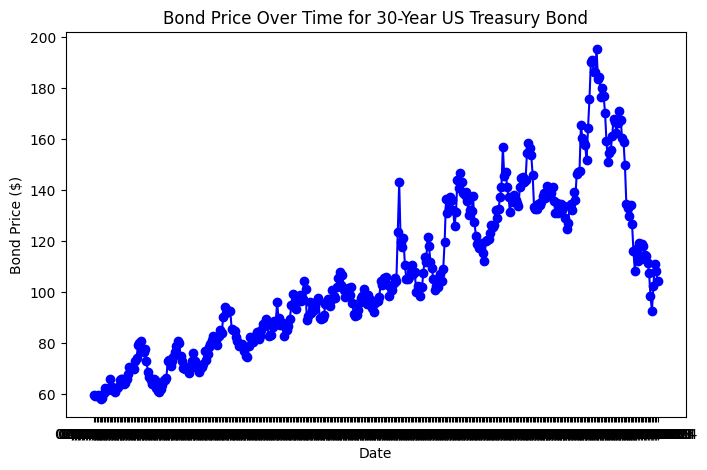

In [64]:
plt.figure(figsize=(8, 5))
plt.plot(df_bond.index, df_bond['Bond Price'], marker='o', linestyle='-', color='blue')
plt.xlabel('Date')
plt.ylabel('Bond Price ($)')
plt.title('Bond Price Over Time for 30-Year US Treasury Bond')
plt.show()

In [65]:
df = pd.concat([df_gold['Price'], df_stock['Price'], df_hpi['USA\n\n(SA)'], df_russel['Close'], df_mean_house_price['Mean Price'], df_gdp['GDP'],df_bond['Bond Price']], axis=1)
df.columns = ['gold_close_price', 'stock_close_price','seasonal_adjusted_HPI', 'Russel', 'Mean House Price', 'GDP', 'Bond_Price']

<h3>Final Dataset</h3>

In [66]:
print(df.head())
print(df.shape)

           gold_close_price stock_close_price seasonal_adjusted_HPI  \
01/01/1991           368.50            343.90                   100   
02/01/1991           370.70            367.10                100.45   
03/01/1991           359.40            375.20                100.48   
04/01/1991           359.50            375.40                100.33   
05/01/1991           364.80            389.80                100.38   

                Russel  Mean House Price       GDP  Bond_Price  
01/01/1991  189.479996            117900  6035.178   59.400228  
02/01/1991  202.940002            119900       NaN   59.319497  
03/01/1991  208.529999            122500       NaN   59.071160  
04/01/1991  208.309998            121000  6126.862   59.495882  
05/01/1991  216.229996            116000       NaN   58.889704  
(398, 7)


<h3>Linear Interpolation of the GDP of NAN Values</h3>

<h7>Calculate the slope (m) of the line between the known GDP values for 1991 1st quarter and 1991 2nd quarter:

m = (GDP1991Q1 - GDP1991Q2) / (Year1991Q1 - Year1991Q2)

Calculate the GDP value for the year 1991 months between the Q1 & Q2 using the equation of a straight line (y = mx + b), where x is the year/Quarter (1991Q1) and b is the y-intercept:

GDP1991Feb = m * Year1991Feb + b

In [69]:
df['GDP'] = df['GDP'].interpolate(method='linear', limit_direction='both')
df.head()

,gold_close_price,stock_close_price,seasonal_adjusted_HPI,Russel,Mean House Price,GDP,Bond_Price
01/01/1991,368.5,343.9,100.00,189.479996,117900.0,6035.178000,59.400228
02/01/1991,370.7,367.1,100.45,202.940002,119900.0,6065.739333,59.319497
03/01/1991,359.4,375.2,100.48,208.529999,122500.0,6096.300667,59.071160
04/01/1991,359.5,375.4,100.33,208.309998,121000.0,6126.862000,59.495882
05/01/1991,364.8,389.8,100.38,216.229996,116000.0,6153.220333,58.889704


In [67]:
df['gold_close_price'] = df['gold_close_price'].str.replace(',','').astype(float)
df['stock_close_price'] = df['stock_close_price'].str.replace(',','').astype(float)
df['seasonal_adjusted_HPI'] = df['seasonal_adjusted_HPI'].astype(float)
df['Russel'] = df['Russel'].astype(float)
df['Mean House Price'] = df['Mean House Price'].astype(float)

In [70]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 398 entries, 01/01/1991 to 02/01/2024
Data columns (total 7 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   gold_close_price       398 non-null    float64
 1   stock_close_price      398 non-null    float64
 2   seasonal_adjusted_HPI  398 non-null    float64
 3   Russel                 398 non-null    float64
 4   Mean House Price       398 non-null    float64
 5   GDP                    398 non-null    float64
 6   Bond_Price             398 non-null    float64
dtypes: float64(7)
memory usage: 41.0+ KB


In [71]:
df['log_gold_price'] = np.log10(df['gold_close_price'])
df['log_stock_price'] = np.log10(df['stock_close_price'])
df['log_seasonal_adjusted_HPI'] = np.log10(df['seasonal_adjusted_HPI'])
df['log_Russel'] = np.log10(df['Russel'])
df['log_mean_house_price'] = np.log10(df['Mean House Price'])
df['log_gdp'] = np.log10(df['GDP'])
df['log_bond_price'] = np.log10(df['Bond_Price'])

<h3>Dataset with their Log Value</h3>

In [72]:
df.tail()

,gold_close_price,stock_close_price,seasonal_adjusted_HPI,Russel,Mean House Price,GDP,Bond_Price,log_gold_price,log_stock_price,log_seasonal_adjusted_HPI,log_Russel,log_mean_house_price,log_gdp,log_bond_price
10/01/2023,1994.3,4193.8,415.74,2394.590088,417500.0,27956.998000,92.553511,3.299790,3.622608,2.618822,3.379231,5.620656,4.446491,1.966393
11/01/2023,2038.1,4567.8,417.36,2612.870117,429600.0,28056.641333,102.208435,3.309225,3.659707,2.620511,3.417118,5.633064,4.448036,2.009487
12/01/2023,2071.8,4769.8,418.05,2748.209961,418300.0,28156.284667,111.129045,3.316348,3.678500,2.621228,3.439050,5.621488,4.449575,2.045828
01/01/2024,2057.4,4845.6,417.78,2776.350098,430400.0,28255.928000,108.133708,3.313319,3.685348,2.620948,3.443474,5.633872,4.451110,2.033961
02/01/2024,2054.7,5096.3,423.00,2922.159912,417800.0,28255.928000,104.255195,3.312748,3.707255,2.626340,3.465704,5.620968,4.451110,2.018098


In [73]:
selected_columns_2 = ['gold_close_price','stock_close_price','seasonal_adjusted_HPI','Russel','Mean House Price', 'GDP', 'Bond_Price'] 
selected_df = df[selected_columns_2]

<h3>Scaling the Dataset between 0-1</h3>

In [74]:
from sklearn.preprocessing import MinMaxScaler

# Normalize the data
scaler = MinMaxScaler()
df_normalized = pd.DataFrame(scaler.fit_transform(selected_df), columns=selected_df.columns, index=selected_df.index)
df_normalized.head()

,gold_close_price,stock_close_price,seasonal_adjusted_HPI,Russel,Mean House Price,GDP,Bond_Price
01/01/1991,0.061439,0.000000,0.000000,0.000000,0.014109,0.000000,0.010929
02/01/1991,0.062652,0.004882,0.001393,0.004926,0.019868,0.001375,0.010342
03/01/1991,0.056425,0.006586,0.001486,0.006971,0.027354,0.002751,0.008535
04/01/1991,0.056480,0.006628,0.001022,0.006891,0.023035,0.004126,0.011625
05/01/1991,0.059400,0.009658,0.001176,0.009789,0.008638,0.005312,0.007214


In [75]:
selected_columns = ['gold_close_price','stock_close_price','seasonal_adjusted_HPI', 'Russel', 'Mean House Price', 'GDP', 'Bond_Price']
subset_df = df[selected_columns]
correlation_matrix = subset_df.corr()

In [76]:
print(correlation_matrix)

                       gold_close_price  stock_close_price  \
gold_close_price               1.000000           0.805947   
stock_close_price              0.805947           1.000000   
seasonal_adjusted_HPI          0.815758           0.944943   
Russel                         0.818180           0.999307   
Mean House Price               0.863942           0.938588   
GDP                            0.908561           0.933475   
Bond_Price                     0.824222           0.726894   

                       seasonal_adjusted_HPI    Russel  Mean House Price  \
gold_close_price                    0.815758  0.818180          0.863942   
stock_close_price                   0.944943  0.999307          0.938588   
seasonal_adjusted_HPI               1.000000  0.945214          0.970911   
Russel                              0.945214  1.000000          0.943586   
Mean House Price                    0.970911  0.943586          1.000000   
GDP                                 0.959238  0

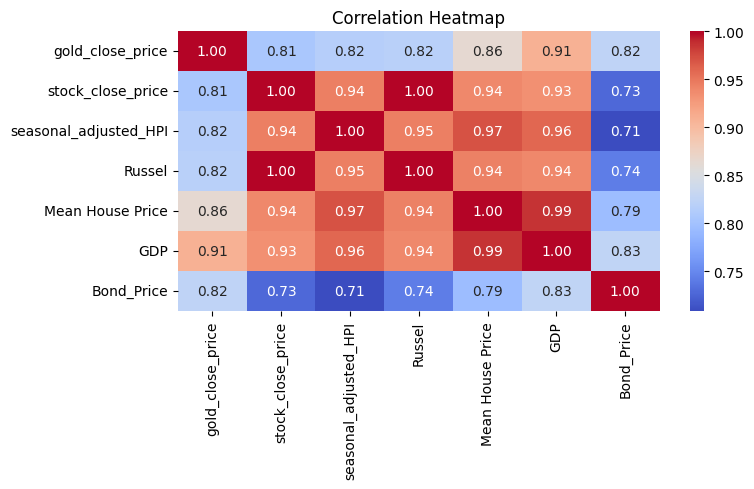

In [77]:
plt.figure(figsize=(8, 5))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap')
plt.xticks(rotation=90)
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

<h3>Scaling Log Dataset</h3>

In [78]:
from sklearn.preprocessing import MinMaxScaler

# Normalize the data
scaler = MinMaxScaler()
df_log_normalized = pd.DataFrame(scaler.fit_transform(subset_df), columns=subset_df.columns)
df_log_normalized.head()

,gold_close_price,stock_close_price,seasonal_adjusted_HPI,Russel,Mean House Price,GDP,Bond_Price
0,0.061439,0.000000,0.000000,0.000000,0.014109,0.000000,0.010929
1,0.062652,0.004882,0.001393,0.004926,0.019868,0.001375,0.010342
2,0.056425,0.006586,0.001486,0.006971,0.027354,0.002751,0.008535
3,0.056480,0.006628,0.001022,0.006891,0.023035,0.004126,0.011625
4,0.059400,0.009658,0.001176,0.009789,0.008638,0.005312,0.007214


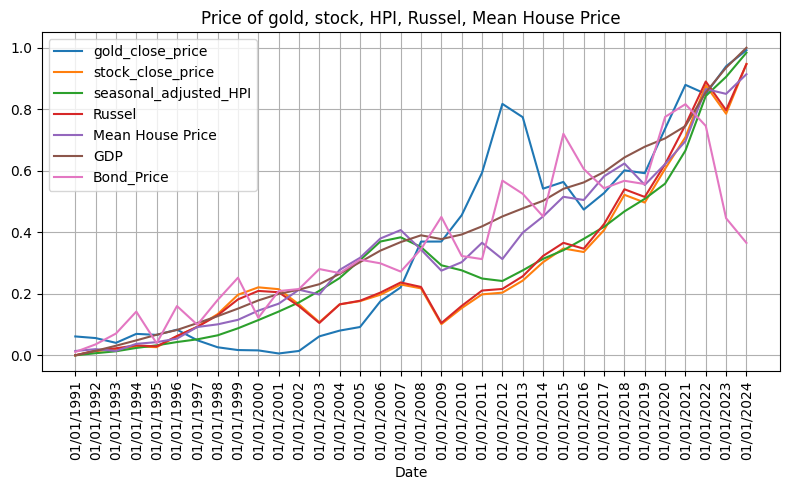

In [79]:
sample_df = df_normalized.iloc[::12]
plt.figure(figsize=(8, 5))
for column in df_normalized.columns:
    plt.plot(sample_df.index, sample_df[column], label=column)
plt.title('Price of gold, stock, HPI, Russel, Mean House Price')
plt.xlabel('Date')
plt.xticks(rotation=90)
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

In [80]:
df_normalized.describe().T

,count,mean,std,min,25%,50%,75%,max
gold_close_price,398.0,0.351257,0.316447,0.0,0.059511,0.234599,0.587186,1.0
stock_close_price,398.0,0.273473,0.233700,0.0,0.128498,0.197911,0.364579,1.0
seasonal_adjusted_HPI,398.0,0.300875,0.243109,0.0,0.093878,0.276300,0.383529,1.0
Russel,398.0,0.279790,0.239654,0.0,0.125890,0.201443,0.382774,1.0
Mean House Price,398.0,0.348498,0.250353,0.0,0.128203,0.321912,0.532249,1.0
GDP,398.0,0.380629,0.261199,0.0,0.157708,0.376850,0.559057,1.0
Bond_Price,398.0,0.353856,0.225551,0.0,0.173874,0.313559,0.540981,1.0


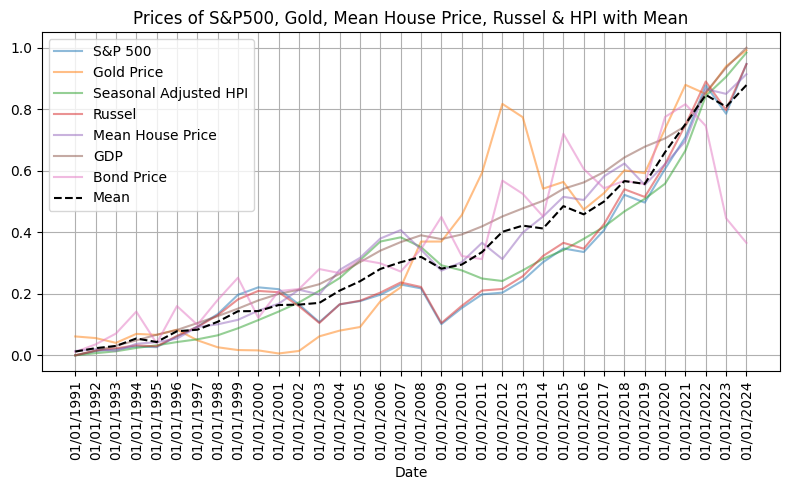

In [83]:
mean_log_prices = sample_df.mean(axis=1)
plt.figure(figsize=(8, 5))
plt.plot(sample_df.index, sample_df['stock_close_price'], label='S&P 500', alpha=0.5)
plt.plot(sample_df.index, sample_df['gold_close_price'], label='Gold Price', alpha=0.5)
plt.plot(sample_df.index, sample_df['seasonal_adjusted_HPI'], label='Seasonal Adjusted HPI', alpha=0.5)
plt.plot(sample_df.index, sample_df['Russel'], label='Russel', alpha=0.5)
plt.plot(sample_df.index, sample_df['Mean House Price'], label='Mean House Price', alpha=0.5)
plt.plot(sample_df.index, sample_df['GDP'], label='GDP', alpha=0.5)
plt.plot(sample_df.index, sample_df['Bond_Price'], label='Bond Price', alpha=0.5)
plt.plot(mean_log_prices.index, mean_log_prices, color='black', linestyle='--', label='Mean')
plt.title('Prices of S&P500, Gold, Mean House Price, Russel & HPI with Mean')
plt.xlabel('Date')
plt.legend()
plt.xticks(rotation=90)
plt.grid(True)
plt.tight_layout()
plt.show()

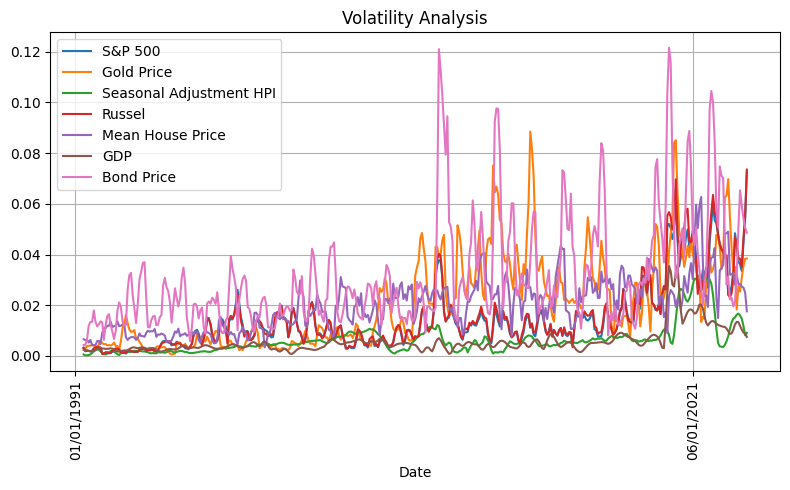

In [84]:
rolling_std = df_normalized.rolling(window=6).std()
plt.figure(figsize=(8,5))
plt.plot(rolling_std.index, rolling_std['stock_close_price'], label='S&P 500')
plt.plot(rolling_std.index, rolling_std['gold_close_price'], label='Gold Price')
plt.plot(rolling_std.index, rolling_std['seasonal_adjusted_HPI'], label='Seasonal Adjustment HPI')
plt.plot(rolling_std.index, rolling_std['Russel'], label='Russel')
plt.plot(rolling_std.index, rolling_std['Mean House Price'], label='Mean House Price')
plt.plot(rolling_std.index, rolling_std['GDP'], label='GDP')
plt.plot(rolling_std.index, rolling_std['Bond_Price'], label='Bond Price')
plt.title('Volatility Analysis')
plt.xlabel('Date')
plt.legend()
plt.xticks(rotation=90)
plt.gca().xaxis.set_major_locator(mdates.YearLocator(1)) 
plt.grid(True)
plt.tight_layout()
plt.show()

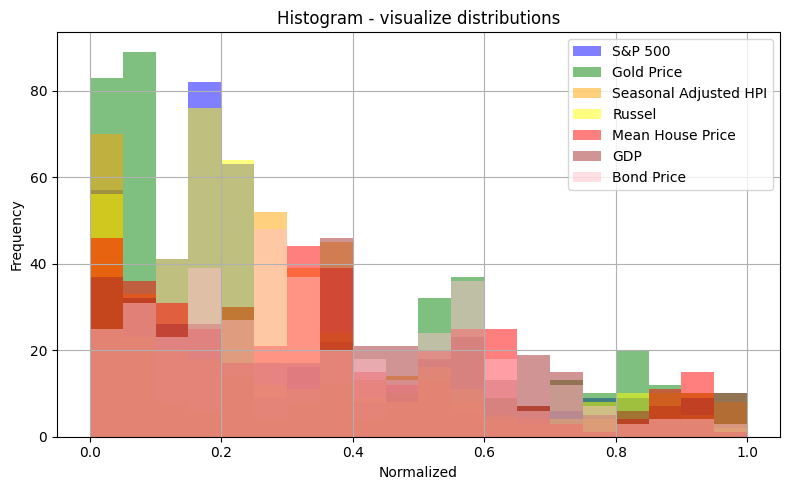

In [85]:
plt.figure(figsize=(8,5))
plt.hist(df_normalized['stock_close_price'], bins=20, alpha=0.5, label='S&P 500', color='blue')
plt.hist(df_normalized['gold_close_price'], bins=20, alpha=0.5, label='Gold Price', color='green')
plt.hist(df_normalized['seasonal_adjusted_HPI'], bins=20, alpha=0.5, label='Seasonal Adjusted HPI', color='orange')
plt.hist(df_normalized['Russel'], bins=20, alpha=0.5, label='Russel', color='yellow')
plt.hist(df_normalized['Mean House Price'], bins=20, alpha=0.5, label='Mean House Price', color='red')
plt.hist(df_normalized['GDP'], bins=20, alpha=0.5, label='GDP', color='brown')
plt.hist(df_normalized['Bond_Price'], bins=20, alpha=0.5, label='Bond Price', color='Pink')
plt.title('Histogram - visualize distributions')
plt.xlabel('Normalized')
plt.ylabel('Frequency')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

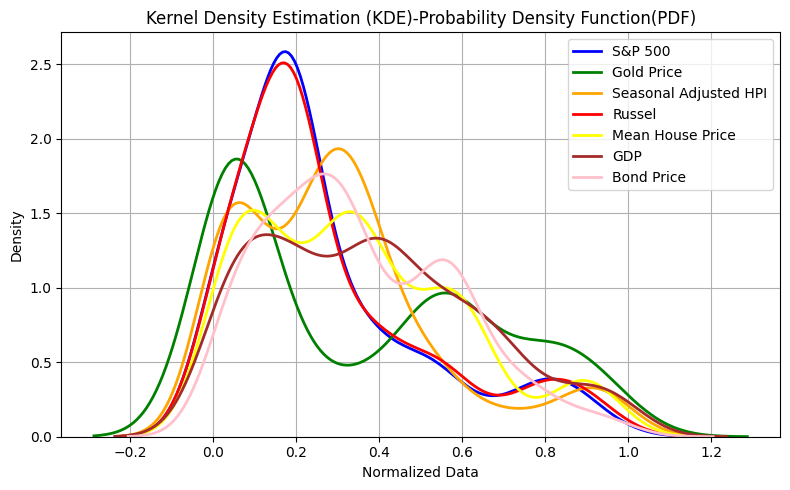

In [87]:
plt.figure(figsize=(8,5))
sns.kdeplot(data=df_normalized['stock_close_price'], label='S&P 500', color='blue', linewidth=2)
sns.kdeplot(data=df_normalized['gold_close_price'], label='Gold Price', color='green', linewidth=2)
sns.kdeplot(data=df_normalized['seasonal_adjusted_HPI'], label='Seasonal Adjusted HPI', color='Orange', linewidth=2)
sns.kdeplot(data=df_normalized['Russel'], label='Russel', color='red', linewidth=2)
sns.kdeplot(data=df_normalized['Mean House Price'], label='Mean House Price', color='Yellow', linewidth=2)
sns.kdeplot(data=df_normalized['GDP'], label='GDP', color='Brown', linewidth=2)
sns.kdeplot(data=df_normalized['Bond_Price'], label='Bond Price', color='Pink', linewidth=2)
plt.title('Kernel Density Estimation (KDE)-Probability Density Function(PDF)')
plt.xlabel('Normalized Data')
plt.ylabel('Density')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

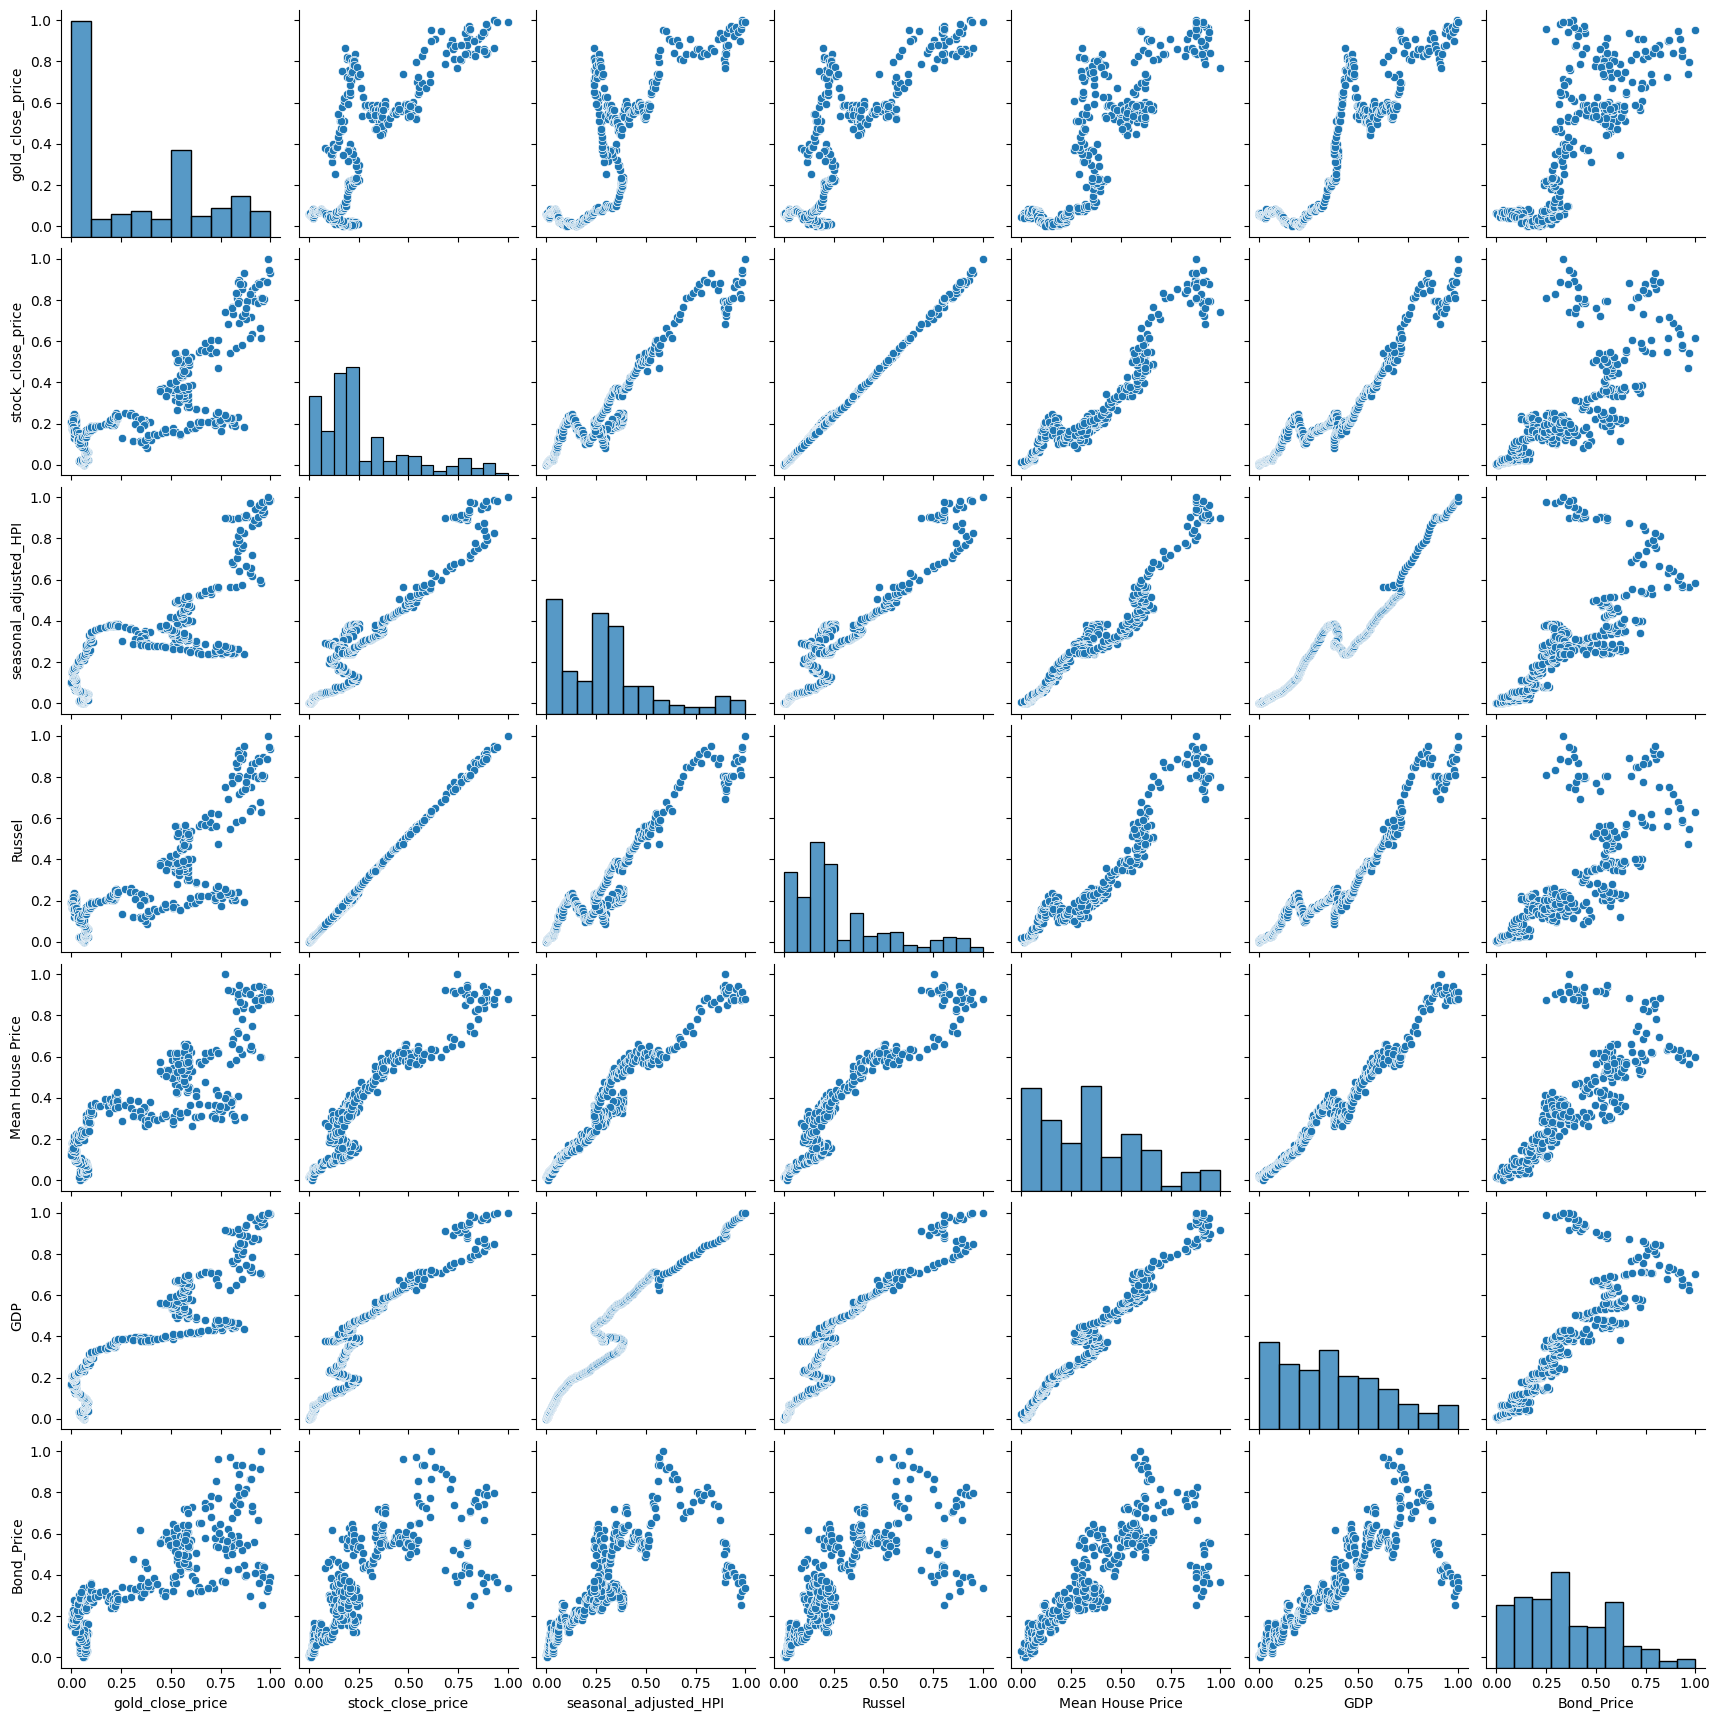

In [88]:
sns.pairplot(df_normalized)
plt.show()

<h3> Augmented Dickey-Fuller (ADF) test to check the data is stationary or non-stationary </h3>

In [89]:
from statsmodels.tsa.stattools import adfuller
import statsmodels.api as sm

def adf_test(series, column_name):
    result = adfuller(series)
    print(f'ADF statistics for {column_name}: {result[0]}')
    print(f'p-value for {column_name}: {result[1]}')
    for key, value in result[4].items():
        print(f'Critical Value {key}: {value}')
    if result[1] <= 0.05:
        print(f"{column_name} is stationary")
    else:
        print(f"{column_name} is not stationary")
    print('')

for column in df_normalized.columns:
    adf_test(df_normalized[column], column)

ADF statistics for gold_close_price: -0.01020736677662353
p-value for gold_close_price: 0.9576797593638106
Critical Value 1%: -3.4474498334928687
Critical Value 5%: -2.8690765390453703
Critical Value 10%: -2.570784795075055
gold_close_price is not stationary

ADF statistics for stock_close_price: 2.2016469985772193
p-value for stock_close_price: 0.9988838574347967
Critical Value 1%: -3.44753973676872
Critical Value 5%: -2.8691160516676844
Critical Value 10%: -2.57080585953957
stock_close_price is not stationary

ADF statistics for seasonal_adjusted_HPI: 1.6148155268360727
p-value for seasonal_adjusted_HPI: 0.997901350063625
Critical Value 1%: -3.44714244478345
Critical Value 5%: -2.8689414326247995
Critical Value 10%: -2.5707127699396084
seasonal_adjusted_HPI is not stationary

ADF statistics for Russel: 1.991876780869076
p-value for Russel: 0.9986623025326871
Critical Value 1%: -3.44753973676872
Critical Value 5%: -2.8691160516676844
Critical Value 10%: -2.57080585953957
Russel is not

<h3> Convert Non-Stationary Data to Stationary through Differencing</h3>

In [90]:
df_transformed = df_normalized.diff().dropna()
df_transformed.head()

,gold_close_price,stock_close_price,seasonal_adjusted_HPI,Russel,Mean House Price,GDP,Bond_Price
02/01/1991,0.001212,0.004882,0.001393,0.004926,0.005759,0.001375,-0.000587
03/01/1991,-0.006227,0.001704,0.000093,0.002046,0.007486,0.001375,-0.001807
04/01/1991,0.000055,0.000042,-0.000464,-0.000081,-0.004319,0.001375,0.003090
05/01/1991,0.002920,0.003030,0.000155,0.002898,-0.014397,0.001186,-0.004411
06/01/1991,0.003802,-0.003914,0.000402,-0.003773,0.008638,0.001186,-0.007214


In [91]:
def adf_test(series, column_name):
    result = adfuller(series)
    print(f'ADF statistics for {column_name}: {result[0]}')
    print(f'p-value for {column_name}: {result[1]}')
    for key, value in result[4].items():
        print(f'Critical Value {key}: {value}')
    if result[1] <= 0.05:
        print(f"{column_name} is stationary")
    else:
        print(f"{column_name} is not stationary")
    print('')

for column in df_transformed.columns:
    adf_test(df_transformed[column], column)

ADF statistics for gold_close_price: -4.601529298330717
p-value for gold_close_price: 0.00012833386626724913
Critical Value 1%: -3.4474498334928687
Critical Value 5%: -2.8690765390453703
Critical Value 10%: -2.570784795075055
gold_close_price is stationary

ADF statistics for stock_close_price: -5.635901140276859
p-value for stock_close_price: 1.063288353585176e-06
Critical Value 1%: -3.44753973676872
Critical Value 5%: -2.8691160516676844
Critical Value 10%: -2.57080585953957
stock_close_price is stationary

ADF statistics for seasonal_adjusted_HPI: -2.8637359269989022
p-value for seasonal_adjusted_HPI: 0.04973045311577133
Critical Value 1%: -3.44714244478345
Critical Value 5%: -2.8689414326247995
Critical Value 10%: -2.5707127699396084
seasonal_adjusted_HPI is stationary

ADF statistics for Russel: -5.911232596118627
p-value for Russel: 2.6358951946741263e-07
Critical Value 1%: -3.44753973676872
Critical Value 5%: -2.8691160516676844
Critical Value 10%: -2.57080585953957
Russel is st

<h3> Determining Optimal Lag Length using VAR model - AIC (Akaike Information Criterion) and BIC (Bayesian Information Criterion)

In [92]:
from statsmodels.tsa.api import VAR

model = VAR(df_transformed)
lag_order = model.select_order(maxlags=10)
print(lag_order.summary())
best_lag = lag_order.aic
print(f'Best Lag aacording to AIC: {best_lag}')

 VAR Order Selection (* highlights the minimums)  
       AIC         BIC         FPE         HQIC   
--------------------------------------------------
0       -63.70      -63.63   2.162e-28      -63.67
1       -65.73     -65.16*   2.833e-29      -65.51
2       -65.95      -64.87   2.293e-29     -65.52*
3       -66.14      -64.56   1.895e-29      -65.51
4       -66.21      -64.14   1.759e-29      -65.39
5       -66.28      -63.70   1.653e-29      -65.25
6       -66.34      -63.26   1.556e-29      -65.12
7       -66.42      -62.84   1.447e-29      -65.00
8       -66.48      -62.40   1.360e-29      -64.86
9      -66.63*      -62.05  1.179e-29*      -64.81
10      -66.60      -61.52   1.227e-29      -64.58
--------------------------------------------------
Best Lag aacording to AIC: 9


C:\Users\HP\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


<h3>Granger Casuality Test for each pair of the Variable and constructs a matrix indicating the presence of Granger causality relationships.

In [93]:
from statsmodels.tsa.stattools import grangercausalitytests

max_lag = 10
def granger_causality_matrix(data, max_lag):
    variables = data.columns
    matrix = np.zeros((len(variables), len(variables)), dtype=int)
    for i, var1 in enumerate(variables):
        for j, var2 in enumerate(variables):
            if i != j:
                result = grangercausalitytests(data[[var2, var1]], max_lag, verbose=False)
                p_values = [result[k + 1][0]['ssr_ftest'][1] for k in range(max_lag)]
                if any(p_value < 0.05 for p_value in p_values):
                    matrix[i, j] = 1
    return matrix
causality_matrix = granger_causality_matrix(df_transformed, max_lag)
causality_df = pd.DataFrame(causality_matrix, index=df_transformed.columns, columns=df_transformed.columns)
print(causality_df)

C:\Users\HP\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\stattools.py:1545: FutureWarning: verbose is deprecated since functions should not print results
  warnings.warn(
C:\Users\HP\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\stattools.py:1545: FutureWarning: verbose is deprecated since functions should not print results
  warnings.warn(
C:\Users\HP\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\stattools.py:1545: FutureWarning: verbose is deprecated since functions should not print results
  warnings.warn(
C:\Users\HP\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\stattools.py:1545: FutureWarning: verbose is deprecated since functions should not print results
  warnings.warn(
C:\Users\HP\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\stattools.py:1545: FutureWarning: verbose is deprecated since functions should not print results
  warnings.warn(


                       gold_close_price  stock_close_price  \
gold_close_price                      0                  0   
stock_close_price                     1                  0   
seasonal_adjusted_HPI                 1                  0   
Russel                                1                  1   
Mean House Price                      1                  0   
GDP                                   1                  1   
Bond_Price                            1                  0   

                       seasonal_adjusted_HPI  Russel  Mean House Price  GDP  \
gold_close_price                           1       0                 0    0   
stock_close_price                          1       1                 1    1   
seasonal_adjusted_HPI                      0       0                 1    1   
Russel                                     1       0                 1    1   
Mean House Price                           0       1                 0    1   
GDP                          

C:\Users\HP\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\stattools.py:1545: FutureWarning: verbose is deprecated since functions should not print results
  warnings.warn(
C:\Users\HP\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\stattools.py:1545: FutureWarning: verbose is deprecated since functions should not print results
  warnings.warn(
C:\Users\HP\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\stattools.py:1545: FutureWarning: verbose is deprecated since functions should not print results
  warnings.warn(


<h3> Granger Casuality Test with Lags from 1 - 20

In [94]:
def granger_causality_report(data, max_lag):
    variables = data.columns
    report = {}

    for var1 in variables:
        for var2 in variables:
            if var1 != var2:
                p_values = []
                for lag in range(1, max_lag + 1):
                    result = grangercausalitytests(data[[var2,var1]], lag, verbose=False)
                    p_value = result[lag][0]['ssr_ftest'][1]
                    p_values.append(p_value)
                report[f"{var1}->{var2}"] = p_values

    return report

max_lag = 20
report = granger_causality_report(df_transformed, max_lag)

for key, values in report.items():
    print(f"{key}:", end="")
    for lag, p_value in enumerate(values, start=1):
        print(f"Lag {lag}: {p_value:.2f}", end = "," if lag < max_lag else "\n")

C:\Users\HP\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\stattools.py:1545: FutureWarning: verbose is deprecated since functions should not print results
  warnings.warn(
C:\Users\HP\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\stattools.py:1545: FutureWarning: verbose is deprecated since functions should not print results
  warnings.warn(
C:\Users\HP\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\stattools.py:1545: FutureWarning: verbose is deprecated since functions should not print results
  warnings.warn(
C:\Users\HP\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\stattools.py:1545: FutureWarning: verbose is deprecated since functions should not print results
  warnings.warn(
C:\Users\HP\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\stattools.py:1545: FutureWarning: verbose is deprecated since functions should not print results
  warnings.warn(


gold_close_price->stock_close_price:Lag 1: 0.82,Lag 2: 0.74,Lag 3: 0.82,Lag 4: 0.77,Lag 5: 0.82,Lag 6: 0.87,Lag 7: 0.81,Lag 8: 0.83,Lag 9: 0.09,Lag 10: 0.11,Lag 11: 0.11,Lag 12: 0.03,Lag 13: 0.03,Lag 14: 0.10,Lag 15: 0.02,Lag 16: 0.06,Lag 17: 0.07,Lag 18: 0.09,Lag 19: 0.08,Lag 20: 0.10
gold_close_price->seasonal_adjusted_HPI:Lag 1: 0.01,Lag 2: 0.01,Lag 3: 0.00,Lag 4: 0.00,Lag 5: 0.01,Lag 6: 0.02,Lag 7: 0.03,Lag 8: 0.07,Lag 9: 0.06,Lag 10: 0.06,Lag 11: 0.04,Lag 12: 0.04,Lag 13: 0.06,Lag 14: 0.07,Lag 15: 0.09,Lag 16: 0.02,Lag 17: 0.03,Lag 18: 0.06,Lag 19: 0.08,Lag 20: 0.06
gold_close_price->Russel:Lag 1: 0.83,Lag 2: 0.76,Lag 3: 0.89,Lag 4: 0.78,Lag 5: 0.79,Lag 6: 0.88,Lag 7: 0.75,Lag 8: 0.77,Lag 9: 0.08,Lag 10: 0.10,Lag 11: 0.09,Lag 12: 0.03,Lag 13: 0.03,Lag 14: 0.11,Lag 15: 0.02,Lag 16: 0.06,Lag 17: 0.07,Lag 18: 0.09,Lag 19: 0.08,Lag 20: 0.11
gold_close_price->Mean House Price:Lag 1: 0.23,Lag 2: 0.47,Lag 3: 0.41,Lag 4: 0.23,Lag 5: 0.21,Lag 6: 0.26,Lag 7: 0.31,Lag 8: 0.37,Lag 9: 0.23,Lag

In [95]:
df_report = pd.DataFrame(report, index=[f"Lag {lag}" for lag in range(1, max_lag + 1)])
df_report = df_report.transpose()
df_report.head(10)

,Lag 1,Lag 2,Lag 3,Lag 4,Lag 5,Lag 6,Lag 7,Lag 8,Lag 9,Lag 10,Lag 11,Lag 12,Lag 13,Lag 14,Lag 15,Lag 16,Lag 17,Lag 18,Lag 19,Lag 20
gold_close_price->stock_close_price,0.824047,7.363626e-01,8.214964e-01,7.683775e-01,8.164339e-01,8.669198e-01,8.080942e-01,8.323110e-01,8.986466e-02,1.116876e-01,1.091881e-01,3.072281e-02,3.414299e-02,9.916425e-02,2.432878e-02,6.426863e-02,6.820219e-02,8.956642e-02,7.658376e-02,1.029404e-01
gold_close_price->seasonal_adjusted_HPI,0.008397,1.463017e-02,3.278724e-03,4.489034e-03,1.290475e-02,1.987414e-02,3.437581e-02,6.639613e-02,5.580287e-02,6.013089e-02,4.097513e-02,4.370818e-02,5.904249e-02,7.318066e-02,9.240169e-02,2.091471e-02,2.698547e-02,5.860258e-02,7.552218e-02,6.495803e-02
gold_close_price->Russel,0.827933,7.568456e-01,8.873625e-01,7.776427e-01,7.882536e-01,8.753099e-01,7.495870e-01,7.742746e-01,8.417736e-02,9.822654e-02,9.004344e-02,2.635420e-02,2.964130e-02,1.073026e-01,2.368571e-02,6.442774e-02,7.411248e-02,9.476553e-02,7.533411e-02,1.051328e-01
gold_close_price->Mean House Price,0.233684,4.662976e-01,4.138918e-01,2.250652e-01,2.116221e-01,2.588086e-01,3.104903e-01,3.722865e-01,2.284934e-01,2.501361e-01,2.789173e-01,3.582187e-01,4.311850e-01,5.202535e-01,9.602159e-02,8.736703e-02,7.521757e-02,1.057693e-01,1.699134e-01,1.895285e-01
gold_close_price->GDP,0.883038,9.257113e-01,9.617427e-01,7.636989e-01,2.594504e-01,1.694310e-01,7.678472e-02,1.045084e-01,1.033175e-01,3.125279e-01,3.503615e-01,4.395884e-01,3.486421e-01,3.994326e-01,4.194029e-01,4.933432e-01,3.129298e-01,2.533433e-01,2.093974e-01,1.526423e-01
gold_close_price->Bond_Price,0.817749,8.770843e-01,9.431859e-01,9.384813e-01,9.773691e-01,9.352094e-01,9.497982e-01,3.545406e-01,3.576928e-01,4.335303e-01,5.245616e-01,6.274452e-01,5.200409e-01,5.419581e-01,4.336674e-01,3.937418e-01,4.853960e-01,5.595051e-01,6.239947e-01,7.165706e-01
stock_close_price->gold_close_price,0.681822,8.535690e-01,3.269496e-01,4.003045e-01,5.495604e-01,5.316282e-01,6.543712e-02,4.387556e-02,4.876084e-02,1.731524e-02,1.281451e-02,1.703787e-02,1.493009e-02,6.953401e-04,1.563981e-03,1.057523e-03,8.650798e-04,1.107944e-03,1.655070e-03,2.782463e-03
stock_close_price->seasonal_adjusted_HPI,0.000350,8.155102e-10,4.914211e-11,3.745954e-11,2.165047e-11,7.738632e-11,9.334350e-11,3.123825e-10,5.738011e-10,1.696967e-09,4.759273e-09,2.584119e-08,5.897691e-08,4.808565e-08,5.568548e-08,3.419852e-09,5.124788e-09,3.592780e-08,1.455049e-07,1.675902e-08
stock_close_price->Russel,0.588301,9.869812e-02,2.285759e-01,2.825101e-01,6.187487e-03,4.234956e-04,6.085502e-04,7.234182e-05,2.490148e-04,6.651030e-04,2.260306e-04,1.643628e-05,2.386136e-05,3.943025e-04,7.530045e-04,1.627006e-03,2.658310e-03,1.718896e-03,2.065213e-04,2.087197e-04
stock_close_price->Mean House Price,0.022825,2.941801e-03,4.371588e-03,6.676363e-03,7.814239e-04,2.065382e-03,2.822716e-03,3.422559e-03,4.831785e-04,9.026082e-04,1.882215e-03,1.580758e-04,2.631184e-04,2.333395e-04,1.243400e-04,1.381575e-04,3.079684e-04,5.965681e-04,7.179900e-04,1.615316e-03
